# **Por: Juan Esteban Ospina Holguín y Mariana Toro Escobar.**

In [1]:
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
from sympy import init_printing
from scipy import  optimize
init_printing() 
from scipy import integrate
from scipy.integrate import quad
import pandas as pd



# 1. Derivadas.
En el metodo Smoothed-particle hydrodynamics (SPH) se emplean diferentes kernel de aproximación para calcular las propiedades de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

Lucy's Quartic Kernel
$$
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3R)(1- R\right)^3 &  R\leq 1 \\ 
  0 & R>1
  \end{matrix}
\right.
$$
donde,

$$
R=\frac{|(\vec{r}-\vec{r}')|}{h}
$$
y $\alpha_D$ es la constante de normalización:

en 2 dimensiones, viene dada por:$$
\alpha_D = \frac{5}{\pi h^2}
$$

en 3 dimensiones, viene dada por:$$
\alpha_D = \frac{105}{16\pi h^3}
$$

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

Realizar un gráfico del kernel de Lucy.
Encontrar la derivada empleanda la libreria simbolica
Realizar un grafico de los cálculos encontrados con la libreria simbólica y comparar con la derivada numérica de los datos del punto 1.

In [12]:
def R(r,h): 
    """Función para evaluar R
    input:
    r: vector en el espacio
    h:constante
    
    Output
    R(r,h)
    """
    return abs(r)/h
def w(r,h,α):
    """Función para evaluar el Kernel
    input
    
    r: vector en el espacio
    h:constante
    α: constante de normalización
    
    Output
    W(r,h,α)
    """
    return α*(1+3*R(r,h))*((1-R(r,h))**3)

def derivada(r,h):
    """Función para la derivada de W(R,h)
    input:
    r: vector en el espacio
    h:constante
    """
    return 3*((1-R(r,h))**3)-3*((1-R(r,h))**2)*(3*R(r,h)+1)
derivada(-0.5,1)

### Derivada simbolica

In [16]:
R = sp.Symbol('R')#Variable de la derivada
α = sp.Symbol('α')#Constante
k = sp.diff(α*(1+3*R)*((1-R)**3), R)#Se hace la derivada simbolica respecto a R
k

Se aprecia que para $h=1$ la derivada simbolica coincide exactamente para $r>1$. Para $r<1$ la derivada tiene signo contrario, por lo que se hacen dos plots.

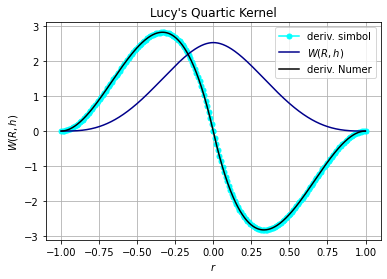

In [18]:
def R(r,h): 
    """Función para evaluar R
    input:
    r: vector en el espacio
    h:constante
    
    Output
    R(r,h)
    """
    return abs(r)/h

h = 1 # Constante 
α = 5/(np.pi * h**2)#Constante de normalización
r = np.linspace(-1,1,1000)#Espacio -1<r<1
l = len(r)/2
r1 = np.linspace(-1,0,100)#Espacio -1<r<1
plt.plot(r1,-α*derivada(r1,h),marker ="o",label = 'deriv. simbol',markersize=5,color ="cyan")#Grafica de la derivada simbolica r<0
plt.plot(r1+1,α*derivada(r1+1,h),marker = "o",markersize=5,color ="cyan")#Grafica de la derivada r>0
plt.plot(r,α*w(r,1,α),label = '$W(R,h)$',color = 'darkblue')#Se grafica el Kernel
plt.plot(r[0:-1],np.diff(w(r,h,α))/np.diff(r),label = 'deriv. Numer',color = 'black')#Grafica de la derivada numérica del Kernel
plt.title('Lucy\'s Quartic Kernel')
plt.xlabel('$r$')
plt.ylabel('$W(R, h)$')

plt.grid()
plt.legend();

Finalmente, notamos que la derivada pasa por cero cuando el kernel es máximo.

# **2.0 Integración**

1. Escribir en código Markdown la deducción para calcular una integral con la regla del trapecio. Ver libro guia.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del Simpson.


1. Escribir en código Markdown la expresión para calcular una integral con el método de cuadratura.

2. Calcular con los metodos 1,2,3 las siguientes integrales

$$
\int_0^1 e^{1-x^2}\, dx
$$
(1)
$$
\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
$$
(2)
$$
\int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
$$
(3)
$$
\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
$$
(4)
$$
\int_{e}^{2e} \frac{1}{\ln x} \, dx
$$
(5)

garantizando que el error sea menor a $\varepsilon=1E-5$.


# **Solución**


**1. Deducción markdown de la regla del trapecio:**

Esta regla se usa para aproximar $\int_{a}^{b}f(x) \ dx$ conociendo los puntos $x_{0}=a, x_{0}=b$, y considerando $h = b-a$.

Usando el polinomio de Lagrange dado por la siguiente expresión:

$$P_{1}(x) = \frac{(x-x_{1})}{x_{0}-x_{1}}f(x_{0}) + \frac{(x-x_{0})}{(x_{1}-x_{0})}f(x_{1})
$$

Se obtiene que, 

$$\int_{a}^{b}f(x) \ dx = \int_{x_{0}}^{x_{1}} [\frac{(x-x_{1})}{x_{0}-x_{1}}f(x_{0}) + \frac{(x-x_{0})}{(x_{1}-x_{0})}f(x_{1})] \ dx + \frac{1}{2} \int_{x_{0}}^{x_{1}} f^{''}(\xi (x))(x-x_{0})(x-x_{1}) \ dx \ \ \ \ \ \ (1)
$$

Al realizar la multiplicación $(x-x_{0})(x-x_{1})$ se sabe que esta no modifica su signo entre $[x_{0},x_{1}]$, y entonces puede aplicarse el Teorema del valor promedio ponderado para integrales al término del error, logrando lo siguiente para ciertos $\xi$ en $(x_{0},x_{1})$:

$$\int_{x_{0}}^{x_{1}} f^{''}(\xi (x))(x-x_{0})(x-x_{1}) \ dx = f^{''}(\xi) \int_{x_{0}}^{x_{1}} (x-x_{0})(x-x_{1}) \ dx
$$
$$= f^{''}(\xi) [\frac{x^{3}}{3} - \frac{(x_{1}+x_{0})^{2}}{2} x^{2} + x_{0}x_{1}x ]_0^1
$$
$$= - \frac{h^{3}}{6} f^{''}(\xi)
$$

Luego, la ecuación (1) implica que,
 
$$\int_{a}^{b}f(x) \ dx = [\frac{(x-x_{1})^{2}}{2(x_{0}-x_{1})}f(x_{0}) + \frac{(x-x_{0})^{2}}{2(x_{1}-x_{0})}f(x_{1}) ]_{x_{0}}^{x_{1}} - \frac{h^{3}}{12} f^{''}(\xi)
$$
$$= \frac{(x_{1}-x_{0})}{2} [f(x_{0}) + f(x_{1})] - \frac{h^{3}}{12} f^{''}(\xi)
$$

Y finalmente, tomando $h = x_{1}-x_{0}$ se define la regla Trapezoidal:

$$ \int_{a}^{b}f(x) \ dx = \frac{h}{2} [f(x_{0}) + f(x_{1})] - \frac{h^{3}}{12} f^{''}(\xi)
$$

Pues cuando $f$ es una función con valores positivos su integral se aproxima mediante el área de un trapecio.

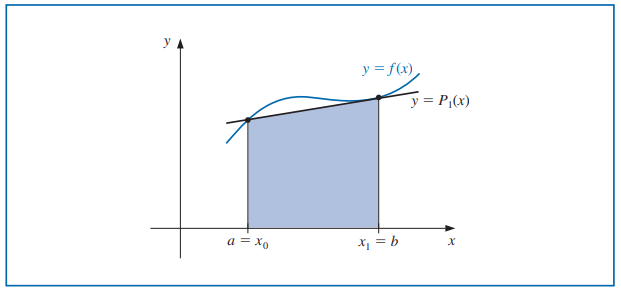

**2. Expresión markdown de la regla de Simpson:**

Esta regla es resultado de la integración sobre $[a,b]$ del segundo polinomio de Lagrange con nodos de igual espaciado, $x_{0}=a$, $x_{2}=b$, y $x_{1}=a+h$ considerando $h=\frac{(b-a)}{2}$.

La regla de Simpson es:

$$ \int_{x_{0}}^{x_{2}}f(x) \ dx = \frac{h}{3} [f(x_{0}) + 4f(x_{1}) + f(x_{2}) ] - \frac{h^{5}}{90} f^{4}(\xi)
$$


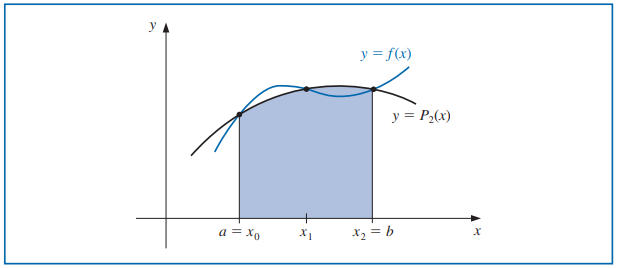

**3. Expresión markdown del método de la cuadratura:**

Esta regla es útil para la evaluación de integrales de funciones que tienen antiderivadas difíciles de encontrar, o en su defecto, que no tienen. Está asociado a la aproximación de $\int_{a}^{b}f(x) \ dx$ a través de $\sum_{i=1}^n a_{i}f(x_{i})$.

Siendo así, se define la cuadratura numérica como:

$$ \int_{a}^{b}f(x) \ dx \approx \sum_{i=1}^n a_{i}f(x_{i})
$$

Cuyo error está dado por la expresión:

$$ E(f) = \frac{1}{(n+1)!} \int_{a}^{b} \prod_{i=1}^n (x-x_{i}) f^{(n+1)} (\xi(x)) \ dx
$$

**4. Calcular las integrales**

**Integral (1)**

Para esta primera integral se realizarán los métodos paso a paso, se construirán funciones generales para cada uno de ellos, y luego se resolverán también usando las librerías de scipy. Para las siguientes integrales solo se emplearán las librerías.

$$
\int_0^1 e^{1-x^2}\, dx
$$

1.1 Método del trapecio

Método del trapecio manual

In [ ]:
"""
  Método del trapecio paso a paso

"""

# Definir la función f(x)
x = sp.symbols("x")
f = lambda x: sp.exp(1 - x**2)
f(x)

In [ ]:
# Hallar la segunda derivada
f2 = sp.diff(f(x), x, 2)
f2

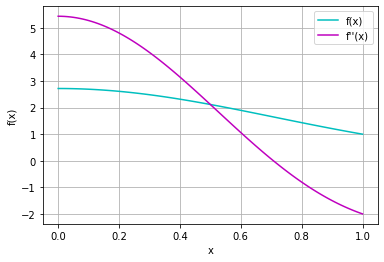

Optimization terminated successfully.
         Current function value: -2.426123
         Iterations: 2
         Function evaluations: 34
El máximo M es: 2.42


In [ ]:
# Hallar el máximo

# Convertir a numpy la función f(x) y f''(x)
fx = sp.lambdify(x, f(x), 'numpy') 
fxn2 = sp.lambdify(x, -f2, 'numpy')

# Definir el intervalo
x_ = np.linspace(0, 1, 100)

# Gráfico de f(x) y f''(x)
plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Función para el valor máximo M
fp=optimize.fmin_powell( fxn2, 0.1,  ftol=1E-7 )
print ("El máximo M es: 2.42")

In [ ]:
# Hallar el tamaño del paso h para obtener la precisión

epsilon = 1e-5
M = 2.42
a = 0
b = 1
h = np.sqrt((epsilon*12)/((b-a)*M))
print("El paso h es:", h)

# Hallar el número de términos N para obtener la precisión

N = int((b-a)/h)
print("El número de términos N es:", N)

El paso h es: 0.007041787902195304
El número de términos N es: 142


Se considera la siguiente expresión para calcular la integral:

\begin{equation}
\int_{a}^{b}f(x)dx=  \frac{h}{2}\left[f(a)+2\sum_{j=1}^{n-1}f(x_j)+f(b)\right ]
\end{equation}

In [ ]:
# Sustituyendo los términos de la eq. del método del trapecio

T1 =  (fx(a))
T3 =  (fx(b))

# Definir los puntos extremos
x = np.linspace(a, b, N+1)
x_interior = x[1:-1]
T2 =  np.sum(fx(x_interior))

trap = 0.5*h*(T1 + 2*T2 + T3)

print("El valor de la integral haciendo manualmente el método del trapecio es:", trap)

El valor de la integral haciendo manualmente el método del trapecio es: 2.029935979754362


In [ ]:
"""
  Método del trapecio generalizado en funciones

"""
# Función para hallar el máximo
def max(f):
  x = sp.symbols("x")
  f2 = sp.diff(f(x), x, 2) #Segunda derivada
  fx = sp.lambdify(x, f(x), 'numpy')  #Convertir a numpy la función f(x)
  fxn2 = sp.lambdify(x, -f2, 'numpy') #Convertir a numpy la función f''(x)
  fp=optimize.fmin_powell( fxn2, 0.1,  ftol=1E-7 )

  return print("es:", fp)


# Función para hallar el resultado de la integral
def m_trapecio(f, a, b, epsilon, M):  
  x = sp.symbols("x") 
  f2 = sp.diff(f(x), x, 2) #Segunda derivada
  fx = sp.lambdify(x, f(x), 'numpy')  #Convertir a numpy la función f(x)
  fxn2 = sp.lambdify(x, -f2, 'numpy') #Convertir a numpy la función f''(x)
  x_ = np.linspace(a, b, 100) #Definir intervalo

  #plt.figure() #Graficar la función
  #plt.plot(x_, fx(x_), color="c", label="f(x)")
  #plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
  #plt.xlabel("x")
  #plt.ylabel("f(x)")
  #plt.legend()
  #plt.grid()
  #plt.show()
  
  h = np.sqrt((epsilon*12)/((b-a)*M)) #Hallar el paso h
  N = int((b-a)/h) #Hallar el número de términos N

  T1 =  (fx(a)) #Reemplazar en la expresión
  T3 =  (fx(b))
  x = np.linspace(a, b, N+1)
  x_interior = x[1:-1]
  T2 =  np.sum(fx(x_interior))
  trap = 0.5*h*(T1 + 2*T2 + T3)

  return print("El valor de la integral haciendo la generalización del método del trapecio es:", trap)


# Usando las funciones en el problema

f = lambda x: sp.exp(1 - x**2) 
a = 0
b = 1
epsilon = 1e-5

max(f)
print ("El máximo M es:", 2.42)
M = 2.42

m_trapecio(f, a, b, epsilon, M)

Optimization terminated successfully.
         Current function value: -2.426123
         Iterations: 2
         Function evaluations: 34
es: 1.2247448715045794
El máximo M es: 2.42
El valor de la integral haciendo la generalización del método del trapecio es: 2.029935979754362


Método del trapecio de integrate

In [ ]:
# Usando el método del trapecio de integrate

t = integrate.trapz( fx(x_), x_, h )
print("El valor de la integral usando la librería integrate es:", t)

El valor de la integral usando la librería integrate es: 2.0300614641533605


1.2 Método de Simpson

Método de Simpson manual

In [ ]:
"""
  Método de Simpson paso a paso

"""

def simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad  

In [ ]:
# Hallar el intervalo N

# Hallar la cuarta derivada
x = sp.symbols("x")
f4 = sp.diff(f(x), x, 4)
f4

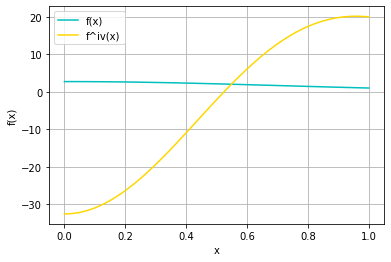

In [ ]:
# Convertir a numpy la función f^iv(x)
fxn4 = sp.lambdify(x, -f4, 'numpy')

# Gráfico de f(x) y f^iv(x)
plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

Se considera la siguiente expresión para calcular el término N de la integral:
$$
N^4 = \frac{(b − a)^5}{180(2)^4\epsilon} \mathrm{Max} ||f^{(4)}(\xi)||
$$

In [ ]:
# Número de términos N
N1 = int(((b-a)**5*M/(epsilon*180*2**4))**(1./4))
print("El número de términos N es:", N1)

# Reemplazar en la función manual
simp = simpson(fx, a, b, N1)
print("El valor de la integral haciendo manualmente el método del Simpson es:", simp)

El número de términos N es: 3
El valor de la integral haciendo manualmente el método del Simpson es: 2.030095482126441


In [ ]:
"""
  Método de Simpson generalizado en funciones

"""

# Función para hallar el valor de N
def val_N(f):
  x = sp.symbols("x") 
  f4 = sp.diff(f(x), x, 2) #Cuarta derivada
  fx = sp.lambdify(x, f(x), 'numpy')  #Convertir a numpy la función f(x)
  fxn4 = sp.lambdify(x, -f4, 'numpy') #Convertir a numpy la función f''(x)
 
  x_ = np.linspace(a, b, 100) #Definir intervalo
  #plt.figure()
  #plt.plot(x_, fx(x_), color="c", label="f(x)")
  #plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
  #plt.xlabel("x")
  #plt.ylabel("f(x)")
  #plt.legend()
  #plt.grid()
  #plt.show()

  N = int(((b-a)**5*M/(epsilon*180*2**4))**(1./4))
  print("El número de términos N es:", N)

# Función para hallar el resultado de la integral
def simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad  

# Usando las funciones en el problema

f = lambda x: sp.exp(1 - x**2) 
a = 0
b = 1
epsilon = 1e-5

val_N(f)
N = 3

simp = simpson(fx, a, b, N)
print("El valor de la integral haciendo la generalización del método del Simpson es:", simp)

El número de términos N es: 3
El valor de la integral haciendo la generalización del método del Simpson es: 2.030095482126441


Método de Simpson de integrate

In [ ]:
# Usando el método de Simpson de integrate

s = integrate.simps(fx(x_) ,x_, dx=0.0001)
print("El valor de la integral usando la librería integrate es:", s)

El valor de la integral usando la librería integrate es: 2.0300783210739026


1.3 Método de cuadratura

In [ ]:
# Usando el método de cuadratura de integrate

q = quad(fx, a, b)[0]
print("El valor de la integral usando la librería integrate es:", q)

El valor de la integral usando la librería integrate es: 2.030078469278705


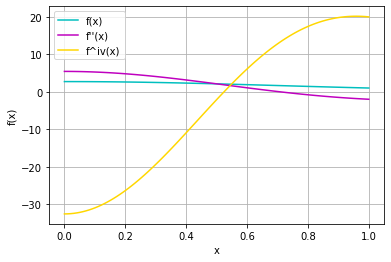

In [ ]:
# Gráfica de la función
f2 = sp.diff(f(x), x, 2) #Segunda derivada (Usada en la regla del trapecio)
f4 = sp.diff(f(x), x, 4) #Cuarta derivada (Usada en la regla de Simpson)
fxn2 = sp.lambdify(x, -f2, 'numpy') 
fxn4 = sp.lambdify(x, -f4, 'numpy')

plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

**Integral (2)**

$$
\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
$$

Considerando que es una integral con límites infinitos, se realiza la sustitución $x = tan(u)$, luego $dx = sec^{2}(u) \ du$ y $u = tan^{-1}(x)$.

Así, cuando $x \rightarrow \infty$, $u = \frac{\pi}{2}$

Y cuando $x \rightarrow - \infty$, $u = - \frac{\pi}{2}$

De modo que la integral puede reescribirse como

$$
\int_{- \frac{\pi}{2}}^{\frac{\pi}{2}} \frac{sec^{2}(u)}{1+tan^2(u)} \, du
$$
$$
= \int_{- \frac{\pi}{2}}^{\frac{\pi}{2}} \, du 
$$




2.1 Método del trapecio

In [ ]:
# Usando el método del trapecio de integrate

# Definir la función
f = lambda x: 1

# Vectorizar la función ya que f de integrate.trapz debe ser un arreglo
fx = np.vectorize(f) 

# Definir el intervalo
x_ = np.linspace(-np.pi/2, np.pi/2, 100)

t = integrate.trapz(fx(x_), x_ ,dx=1e-5)
print("El valor de la integral usando la librería integrate es:", t)

El valor de la integral usando la librería integrate es: 3.141592653589793


2.2 Método de simpson

In [ ]:
# Usando el método de Simpson de integrate

s = integrate.simps(fx(x_) , x_ , dx=1e-5)
print("El valor de la integral usando la librería integrate es:", s)

El valor de la integral usando la librería integrate es: 3.141592653589793


2.3 Método de cuadratura

In [ ]:
# Usando el método de cuadratura de integrate

q = quad(fx, -np.pi/2, np.pi/2)[0]
print("El valor de la integral usando la librería integrate es:", q)

El valor de la integral usando la librería integrate es: 3.141592653589793


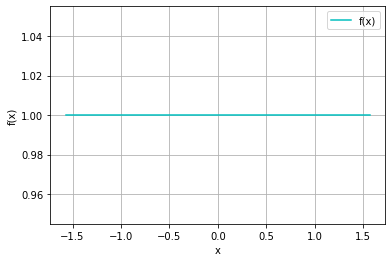

In [ ]:
# Gráfica de la función
plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
#plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
#plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

**Integral (3)**

$$
\int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
$$

Se considera la solución de la primera integral,
$$
\int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dy = cos^3(x)-cos^2(x)sin(x)+sin(x)cos(2x)
$$

Luego, la integral a resolver es:
$$
\int_{0}^{\pi/4}  cos^3(x)-cos^2(x)sin(x)+sin(x)cos(2x) \, dx
$$

3.1 Método del trapecio

In [ ]:
# Usando el método del trapecio de integrate

# Definir la función
f = lambda x: (sp.cos(x))**3-(sp.sin(x))*(sp.cos(x))**2*(sp.sin(x)*sp.cos(2*x))
x = sp.symbols("x") 

# Convertir la función a numpy
fx = sp.lambdify(x, f(x), 'numpy') 
 
# Definir el intervalo
x_ = np.linspace(0, np.pi/4, 100)

t = integrate.trapz(fx(x_), x_ ,dx=1e-5)
print("El valor de la integral usando la librería integrate es:", t)

El valor de la integral usando la librería integrate es: 0.5475860438249496


3.2 Método de Simpson

In [ ]:
# Usando el método de Simpson de integrate

s = integrate.simps(fx(x_) , x_ , dx=1e-5)
print("El valor de la integral usando la librería integrate es:", s)

El valor de la integral usando la librería integrate es: 0.5475889029027119


3.3 Método de la cuadratura

In [ ]:
# Método de la cuadratura de integrate

q = quad(fx, 0, np.pi/4)[0]
print("El valor de la integral usando la librería integrate es:", q)

El valor de la integral usando la librería integrate es: 0.5475889843221229


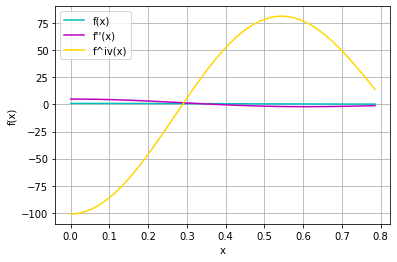

In [ ]:
# Gráfica de la función
f2 = sp.diff(f(x), x, 2) #Segunda derivada (Usada en la regla del trapecio)
f4 = sp.diff(f(x), x, 4) #Cuarta derivada (Usada en la regla de Simpson)
fxn2 = sp.lambdify(x, -f2, 'numpy') 
fxn4 = sp.lambdify(x, -f4, 'numpy')

plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

**Integral (4)** Es la misma del punto 2.


**Integral (5)**

$$
\int_{e}^{2e} \frac{1}{\ln x} \, dx
$$

5.1 Método del trapecio

In [ ]:
# Usando el método del trapecio de integrate

# Definir la función
f = lambda x: 1/sp.log(x)
x = sp.symbols("x") 

# Convertir la función a numpy
fx = sp.lambdify(x, f(x), 'numpy') 
 
# Definir el intervalo
x_ = np.linspace(np.e, 2*(np.e), 100)

t = integrate.trapz(fx(x_), x_ ,dx=1e-5)
print("El valor de la integral usando la librería integrate es:", t)

El valor de la integral usando la librería integrate es: 2.003829642271284


5.2 Método de Simpson

In [ ]:
# Usando el método de Simpson de integrate

s = integrate.simps(fx(x_) , x_ , dx=1e-5)
print("El valor de la integral usando la librería integrate es:", s)

El valor de la integral usando la librería integrate es: 2.003810928192265


5.3 Método de cuadratura

In [ ]:
# Método de la cuadratura de integrate

q = quad(fx, np.e, 2*(np.e))[0]
print("El valor de la integral usando la librería integrate es:", q)

El valor de la integral usando la librería integrate es: 2.0038105616240243


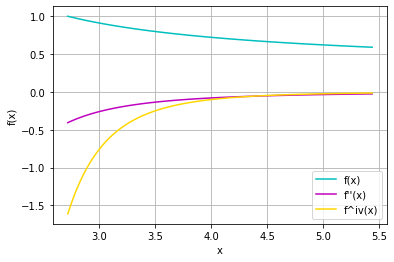

In [ ]:
# Gráfica de la función
f2 = sp.diff(f(x), x, 2) #Segunda derivada (Usada en la regla del trapecio)
f4 = sp.diff(f(x), x, 4) #Cuarta derivada (Usada en la regla de Simpson)
fxn2 = sp.lambdify(x, -f2, 'numpy') 
fxn4 = sp.lambdify(x, -f4, 'numpy')

plt.figure()
plt.plot(x_, fx(x_), color="c", label="f(x)")
plt.plot(x_, fxn2(x_), color="m", label="f''(x)")
plt.plot(x_, fxn4(x_), color="gold", label="f^iv(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# **3.0 Problemas**

1. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all resistance except gravity is neglected, the escape velocity v is given by
$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$
where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

2.  Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

$$
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
$$$$
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
$$
3. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

N	$\epsilon_T$	$\epsilon_S$	$\epsilon_G$
2	...	...	...
10	...	...	...

4. Make a log-log plot of relative errore versus. You should observe that $\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the number of decimal places of presicion in your calculation. 6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

# **Solución**

**1. Velocidad de escape**

In [19]:
#Datos
R = 6371#km
g = 9800#km/s^2

$$
v^2=2gR\int_1 ^\infty z^{-2} dz\\ 
$$

<center>Con $z = \frac{x}{R}$ tenemos:
$$
v^2=2gR^2\int_R ^\infty \frac{1}{x^2} dz,
$$
    
Segun la biblbiografía, la velocidad de escape es $v^2 = 2gR$, veamos que esto se cumple

In [20]:
f= lambda x: 1/(x**2)#Función a integrar
I = integrate.quad(f,R,np.inf)[0]#Se hace la integral 
I

In [21]:
1/R#Resultado esperado

Notamos que el resultado de la integral es aproximadamente el valor numérico de $1/R$, por lo que se verifica la ecuación esperada.

In [22]:
vc = np.sqrt(2*g*(R**2)*I)#Resultado calculado con la integral
print(round(vc,7),"m/s")

11174.5961896 m/s


In [23]:
vt = np.sqrt(2*g*R)#Resultado calculado dado por la teoría
print(round(vt,7),"m/s")

11174.5961896 m/s


Así, la velocidad de escape es $v_e = 11174.6 m/s$.

Notemos que el resultado calculado con la integral coincide con el teorico hasta con 7 cifras significativas

**2. Programa para resolver integrales por los métodos vistos**

En la solución de la integral (1) del punto anterior se plantearon unos programas para resolver las integrales que pueden servir como respuesta alterna a las que se presentan a continuación.

2.1 Regla del trapecio

Con base en la expresión analítica:

 $${ \int_a^b f(x)dx = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1}f(x_i) + f(b)\right]-\frac{b − a}{12}h^2f''(\xi).}$$

In [ ]:
# Método del trapecio

def m_trap(f, a, b, n):
   h = (b - a)/ n # Paso h
   si = (f(a) + f(b))/ 2.  # Comenzar en f_{0}w_{0} + f_{n-1}w_{n-1}
   for i in range(1, n): # Definir la suma hasta n-2 
     S = si + f(a + i*h)  # Intervalo de hasta f_{1}w_{1} + f_{n-2}w_{n-2}
   return S*h 

2.2 Método de Simpson

Con base en la expresión analítica:

$${
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n/2)-1}f(x_{2i}) + 4\sum_{i=1}^{n/2}f(x_{2i-1}) + f(b)\right]-\frac{b − a}{180}h^4f^{(4)}(\xi)
,}$$

In [ ]:
# Método de Simpson

def m_simp(f, a, b, n):
   h = (b - a)/ n
   S0 = f(a) + f(b)
   S1 = 0 
   S2 = 0 
   for i in range(1, n):  # Definir la suma hasta n-1
     if (i%2 == 0):  
        S2 += f(a + i*h) # Intervalo f(2xi)
     else:
        S1 += f(a + i*h) # Intervalo f(2x[i-1])
   return (S0 + 2*S2 + 4*S1) * h/3

2.3 Cuadratura Gaussiana

In [ ]:
"""
  Metodo de Cuadratura Gaussiana (Gauss–Legendre quadratura), con N puntos de intervalo
  [a,b], con arreglos x y w de los puntos x_{i} o raíces del polinomio de Legendre, con pesos
  w_{i}, con E el error deseado, y job: 0 para integración en [a, b],  1 para integración en [0, b]                                                                   
  y 2 para integración en [a, inf] 
"""

# Obtener w_{i} y los x_{i} 
def m_quad2(f, a, b, n):
    w = np.zeros(n)           # Raíces del polinomio de Legendre
    x = np.zeros(n)           # Pesos para la integración

    m_quad1(n, 0, a, b, x, w)   # Puntos x_{i} y w_{i}
    return sum(f(x)*w)        


def m_quad1(n, job, a, b, x, w, E = 3.E-15):
 
    m = (n + 1)//2 # Cálculo de la mitad de las raíces 
    for i in range(1, m + 1): 
        t = np.cos(np.pi*(i - 0.25)/(n + 0.5) ) # Condición inicial 
        t1 = 1                                  # i-esima raiz de orden n
        while( (np.abs(t - t1) ) >= E):       # Newton iteration para hallar las raíces
            p1 = 1. ; p2 = 0.                   
            for j in range(1, n + 1):
                p3 = p2                         # Relación de recurrencia del polinomio de Legendre (P_n(x))
                p2 = p1                         
                p1 = ( (2.*j - 1)*t*p2 - (j - 1.)*p3)/j
                                                # Relación de recurrencia de las derivadas del polinomio de Legendre (P'_n(x))
            pp = n*(t*p1 - p2)/(t*t - 1.)       
            t1 = t
            t  = t1 - p1/pp                     # Definición de x_{i} como x - P_n(x) / P'_n(x).

        x[i - 1] = - t     
        x[n - i] = t        # Cálculo de la otra mitad de las raíces
        w[i - 1] = 2./( (1. - t*t)*pp*pp)       # Definición del peso
        w[n - i] = w[i - 1]                     
        # print(" x[i - 1]", x[i - 1] , " w " , w[n - i])
    if (job == 0):
        for i in range(0, n):
            x[i] = x[i]*(b - a)/2. + (b + a)/2. # Transformación de [-1,1] al intervalo [a, b]
            w[i] = w[i]*(b - a)/2.              
            
    if (job == 1):
        for i in range(0, n):
            xi = x[i]
            x[i] = a*b*(1. + xi)/(b + a - (b - a)*xi)
            w[i] = w[i]*2.*a*b*b/( (b + a - (b - a)*xi)**2. )
            
    if (job == 2):
        for i in range(0, n):
            xi = x[i]
            x[i] = (b*xi + b + a + a)/(1. - xi)
            w[i] = w[i]*2.*(a + b)/( (1. - xi)**2. ) 


Considerando la solución analítica, 

$$\frac{dN}{dt}=e^{-t} $$

$$N(1)=\int_0^1 e^{-t}dt= 1-e^{-1}$$

Se tiene el resultado analítico o valor exacto de $1-e^{-1}$, para la integral en el intervalo (0, 1).


**3. Errores relativos**

In [ ]:
# Errores relativos para cada caso

# Definir la función 

def f(t):
  y=(np.e)**(-t)
  return y
#f = lambda x: (np.e)**(-t)
# Límites de integración
a = 0
b = 1
# Valores de N
N = [2, 10, 20, 40, 80, 160] 

# Errores
def Er(m_, f): # m_: Método
  N = [2, 10, 20, 40, 80, 160] # Valores de N
  IE = (1-(np.e)**-1)*(np.ones(len(N))) # Arreglo con el resultado de la integral
  I = np.zeros(len(N))  # Valor de la integral según el método
  for i in range(len(N)):
    I[i] = m_(f, a, b , N[i])
  ER = np.abs(I - IE) 
  return ER
# Para cada método
er_t = Er(m_trap, f)
er_s = Er(m_simp, f)
er_q = Er(m_quad2, f)

# Creación del DataFrame
datos = {"Error trapecio": er_t,"Error Simpson": er_s,"Error cuadratura": er_q}
datos
df = pd.DataFrame(data=datos, index=N)
df.index.name = " Para N="
df

,Error trapecio,Error Simpson,Error cuadratura
Para N=,,,
2,0.013115,2.131212e-04,1.417993e-04
10,0.523070,3.507605e-07,2.997602e-15
20,0.578587,2.194210e-08,1.332268e-15
40,0.605592,1.371687e-09,1.443290e-15
80,0.618915,8.573531e-11,2.109424e-15
160,0.625532,5.358380e-12,2.220446e-16


**4. Gráficas**

Text(0, 0.5, 'Er')

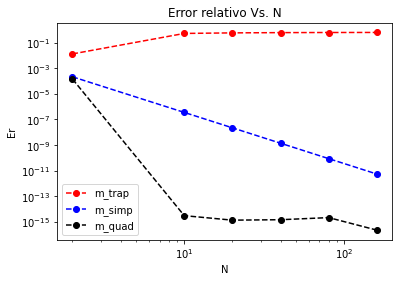

In [ ]:
plt.title("Error relativo Vs. N")
plt.loglog(N, er_t, 'o--', color="red", label="m_trap")
plt.loglog(N, er_s, 'o--', color="blue", label="m_simp")
plt.loglog(N, er_q,'o--', color="black", label="m_quad")
plt.legend()
plt.xlabel("N")
plt.ylabel("Er")